# Important functions

In [1]:
def getPlotTotalReads(df):
    ercc = [idx for idx in df.index if 'ERCC' in idx]
    mt = [idx for idx in df.index if '_chrM' in idx]
    if len(mt) == 0:
        mt = [idx for idx in df.index if '_MT' in idx]
    genes = [idx for idx in df.index if idx not in ercc and idx not in mt]
    plt.bar(range(len(df.columns)), df.loc[genes].sum()+1, log = 'y')
    plt.bar(range(len(df.columns)), df.loc[mt].sum()+1, log = 'y')
    plt.bar(range(len(df.columns)), df.loc[ercc].sum()+1, log = 'y')
    plt.xticks(range(len(df.columns))[::5], df.columns[::5], rotation = 90)
    plt.ylabel('total')
    plt.xlabel('well')
    plt.legend(['genes', 'mt', 'ercc'])
    return plt

In [2]:
def getCBT(dfs, savepdf = 'n', name = ''):
    dfc, dfb, dft = dfs
    fig = plt.figure(figsize=(15,4))
    plt.subplot(131)
    plt1 = getPlotTotalReads(dfc)
    plt1.title('counts')
    plt.subplot(132)
    plt2 = getPlotTotalReads(dfb)
    plt2.title('barcodes')
    plt.subplot(133)
    plt3 = getPlotTotalReads(dft)
    plt3.title('transcripts')
    if savepdf == 'y':
        plt.savefig(name, bbox_inches = 'tight')
    return plt.show()

In [3]:
def plotGeneT(df):
    gene = [idx for idx in df.index if 'T_' in idx]
    plt.bar(range(len(df.columns)), df.loc[gene].sum())
    return plt.show()

In [4]:
def renameColumns(df, label):
    m = len(str(len(df.columns)))
    df.columns = ['-'.join([str(i+1).zfill(m),label]) for i in range(len(df.columns))]
    return df

In [5]:
def readData(filename):
    dfc = read_csv(filename + '.coutc.tsv.gz', sep = '\t', index_col=0)
    dfb = read_csv(filename + '.coutb.tsv.gz', sep = '\t', index_col=0)
    dft = read_csv(filename + '.coutt.tsv.gz', sep = '\t', index_col=0)
    dfc.columns = [c.zfill(3) for c in dfc.columns]; 
    dfb.columns = [c.zfill(3) for c in dfb.columns]; 
    dft.columns = [c.zfill(3) for c in dft.columns]; 
    dfc = dfc[sorted(dfc.columns)]; 
    dfb = dfb[sorted(dfb.columns)]
    dft = dft[sorted(dft.columns)]
    dfc = dfc.reindex(dfb.index)
    dfc = dfc.fillna(0)
    dfc = dfc*(dfb>0) 
    dfc = dfc[dfc.columns[:97]]
    dfb = dfb[dfb.columns[:97]]
    dft = dft[dft.columns[:97]]
    return dfc, dfb, dft

In [6]:
def mergeGstrls_1plates(dfs1, col1, lab1):
    dfc1, dfb1, dft1 = dfs1    
    dfca = dfc1[col1]; dfca.columns = ['-'.join([str(c),str(lab1)]) for c in dfca.columns]
    dfba = dfb1[col1]; dfba.columns = ['-'.join([str(c),str(lab1)]) for c in dfba.columns]
    dfta = dft1[col1]; dfta.columns = ['-'.join([str(c),str(lab1)]) for c in dfta.columns]

    return dfca, dfba, dfta

def mergeGstrls_2plates(dfs1, col1, lab1, dfs2, col2, lab2):
    dfc1, dfb1, dft1 = dfs1    
    dfca = dfc1[col1]; dfca.columns = ['-'.join([str(c),str(lab1)]) for c in dfca.columns]
    dfba = dfb1[col1]; dfba.columns = ['-'.join([str(c),str(lab1)]) for c in dfba.columns]
    dfta = dft1[col1]; dfta.columns = ['-'.join([str(c),str(lab1)]) for c in dfta.columns]
    
    dfc2, dfb2, dft2 = dfs2
    dfcb = dfc2[col2]; dfcb.columns = ['-'.join([str(c),str(lab2)]) for c in dfcb.columns]
    dfbb = dfb2[col2]; dfbb.columns = ['-'.join([str(c),str(lab2)]) for c in dfbb.columns]
    dftb = dft2[col2]; dftb.columns = ['-'.join([str(c),str(lab2)]) for c in dftb.columns]

    dfc = dfca.merge(dfcb, how = 'outer', left_index = True, right_index = True)
    dfb = dfba.merge(dfbb, how = 'outer', left_index = True, right_index = True)
    dft = dfta.merge(dftb, how = 'outer', left_index = True, right_index = True)
    
    dfc = dfc.fillna(0)
    dfb = dfb.fillna(0)
    dft = dft.fillna(0)
    return dfc, dfb, dft

def mergeGstrls_3plates(dfs1, col1, lab1, dfs2, col2, lab2, dfs3, col3, lab3):
    dfc1, dfb1, dft1 = dfs1    
    dfca = dfc1[col1]; dfca.columns = ['-'.join([str(c),str(lab1)]) for c in dfca.columns]
    dfba = dfb1[col1]; dfba.columns = ['-'.join([str(c),str(lab1)]) for c in dfba.columns]
    dfta = dft1[col1]; dfta.columns = ['-'.join([str(c),str(lab1)]) for c in dfta.columns]
    
    dfc2, dfb2, dft2 = dfs2
    dfcb = dfc2[col2]; dfcb.columns = ['-'.join([str(c),str(lab2)]) for c in dfcb.columns]
    dfbb = dfb2[col2]; dfbb.columns = ['-'.join([str(c),str(lab2)]) for c in dfbb.columns]
    dftb = dft2[col2]; dftb.columns = ['-'.join([str(c),str(lab2)]) for c in dftb.columns]

    dfc3, dfb3, dft3 = dfs3
    dfcc = dfc3[col3]; dfcc.columns = ['-'.join([str(c),str(lab3)]) for c in dfcc.columns]
    dfbc = dfb3[col3]; dfbc.columns = ['-'.join([str(c),str(lab3)]) for c in dfbc.columns]
    dftc = dft3[col3]; dftc.columns = ['-'.join([str(c),str(lab3)]) for c in dftc.columns]

    dfc = dfca.merge(dfcb, how = 'outer', left_index = True, right_index = True)
    dfb = dfba.merge(dfbb, how = 'outer', left_index = True, right_index = True)
    dft = dfta.merge(dftb, how = 'outer', left_index = True, right_index = True)
    
    dfc =  dfc.merge(dfcc, how = 'outer', left_index = True, right_index = True)
    dfb =  dfb.merge(dfbc, how = 'outer', left_index = True, right_index = True)
    dft =  dft.merge(dftc, how = 'outer', left_index = True, right_index = True)
    
    dfc = dfc.fillna(0)
    dfb = dfb.fillna(0)
    dft = dft.fillna(0)
    
    return dfc, dfb, dft

In [7]:
def splitGst(dfs, col):
    return [df[col] for df in dfs]

In [8]:
def renameGst(dfs, label):
    dfc, dfb, dft = dfs
    cols = dfc.columns
    if label == 'PA':
        cols = dfc.columns[::-1]
    dfc = dfc[cols]; dfb = dfb[cols]; dft = dft[cols]
    return dfc, dfb, dft

In [9]:
def savedfs(dfs, name):
    dfc, dfb, dft = dfs
    dfc.to_csv(name + '.coutc.tsv', sep = '\t')
    dfb.to_csv(name + '.coutb.tsv', sep = '\t')
    dft.to_csv(name + '.coutt.tsv', sep = '\t')
    return

# Rawdata

First run of experiments: Data is split in two runs (VAN3370 and VAN3371). To map, the trimmed fastq files were concatenated. 

Second round of experiments (VAN3045): Tomo-seq of one additional E8.75 mouse embryo. Sectioned using 20um sections. 

In [13]:
f = '../rawdata/SvdB12h1-2-1-Tomo-20um-E7p75MouseEmbryo-Plate1-Run1Run2_cbc_trimmed_star_spliced'
dfE8rep1plate1 = readData(f)
dfE8rep1plate1[0].sum().sum(), (dfE8rep1plate1[0]/dfE8rep1plate1[1]).mean().mean()

(29643411.0, 1.3008951127998887)

In [14]:
f = '../rawdata/SvdB12h1-2-2-Tomo-20um-E7p75MouseEmbryo-Plate2-Run1Run2_cbc_trimmed_star_spliced'
dfE8rep1plate2 = readData(f)
dfE8rep1plate2[0].sum().sum(), (dfE8rep1plate2[0]/dfE8rep1plate2[1]).mean().mean()

(27924254.0, 1.2251055531616437)

In [15]:
f = '../rawdata/SvdB12h2-3-1-Tomo-20um-E8p75MouseEmbryo-Plate1-Run1Run2_cbc_trimmed_star_spliced'
dfE8rep2plate1 = readData(f)
(dfE8rep2plate1[0]/dfE8rep2plate1[1]).mean().mean()

1.2581311996828068

In [16]:
f = '../rawdata/SvdB12h2-3-2-Tomo-20um-E8p75MouseEmbryo-Plate2-Run1Run2_cbc_trimmed_star_spliced'
dfE8rep2plate2 = readData(f)
(dfE8rep2plate2[0]/dfE8rep2plate2[1]).mean().mean()

1.3312487624174354

In [17]:
f = '../rawdata/SvdB12h-2-2-Tomo-20um-E7p75AndE8p85MouseEmbryo2-Plate2-Run1_cbc_trimmed_star_spliced'
dfE8rep3plate1 = readData(f)
(dfE8rep3plate1[0]/dfE8rep3plate1[1]).mean().mean()

1.1963080587264123

In [18]:
f = '../rawdata/SvdB12h-2-3-Tomo-20um-E8p75MouseEmbryo2-Plate3-Run1_cbc_trimmed_star_spliced'
dfE8rep3plate2 = readData(f)
(dfE8rep3plate2[0]/dfE8rep3plate2[1]).mean().mean()

1.1719346684747134

In [19]:
f = '../rawdata/SvdB12h-2-4-Tomo-20um-E8p75MouseEmbryo2-Plate4-Run1_cbc_trimmed_star_spliced'
dfE8rep3plate3 = readData(f)
(dfE8rep3plate3[0]/dfE8rep3plate3[1]).mean().mean()

1.1232110846996295

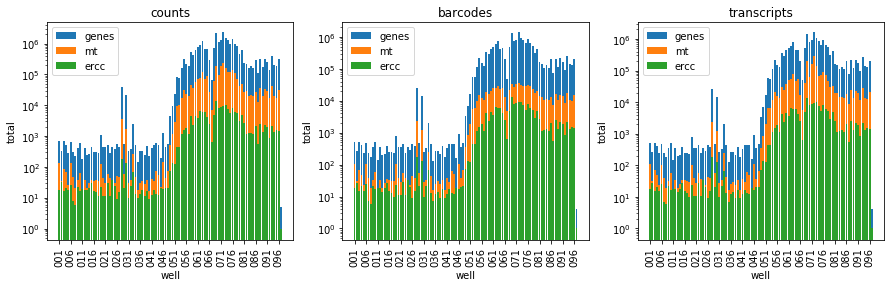

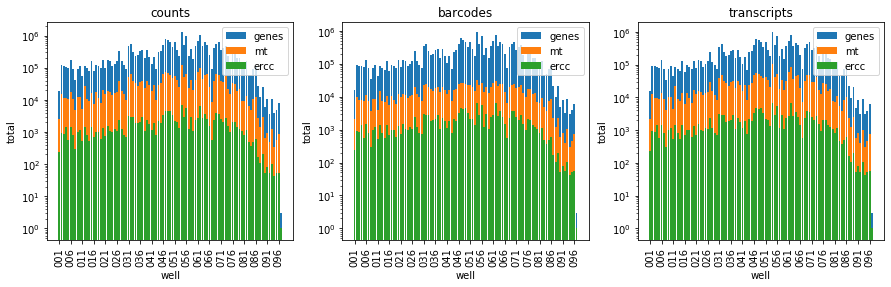

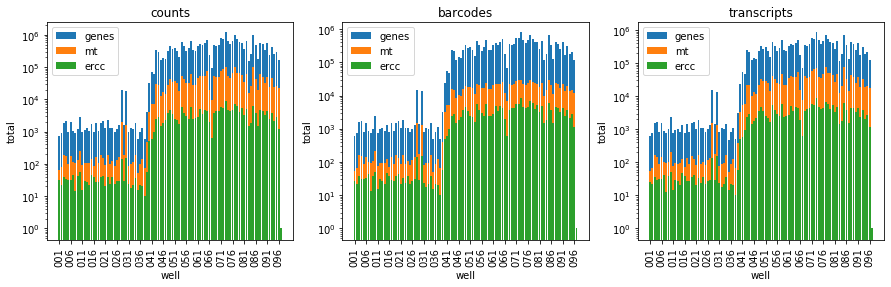

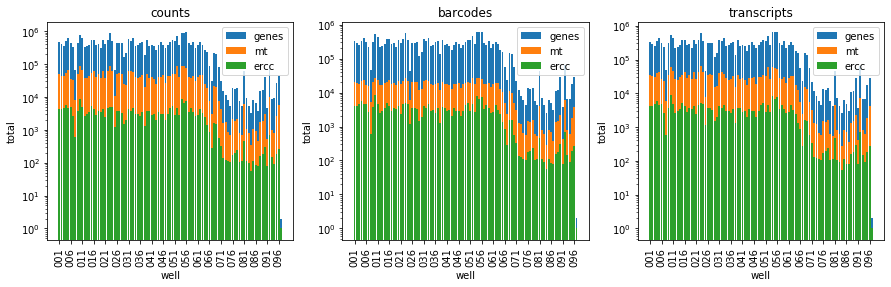

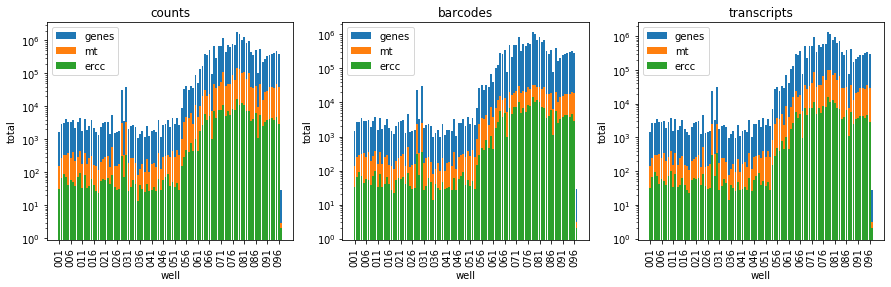

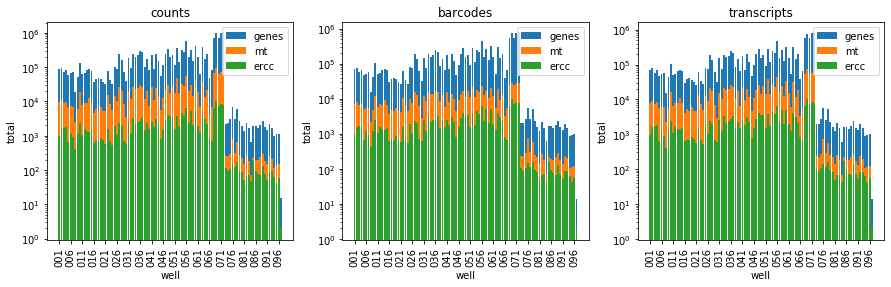

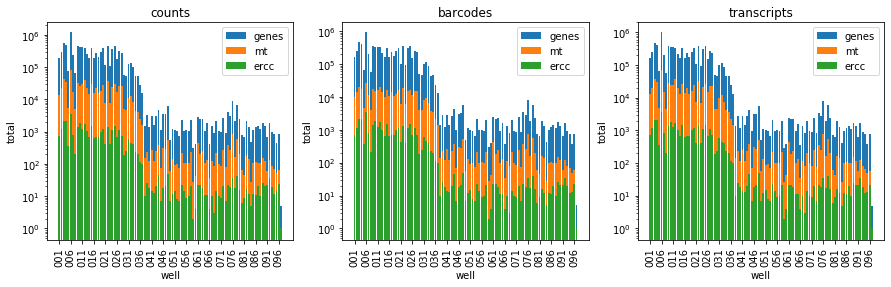

In [20]:
getCBT(dfE8rep1plate1, 'y', '../results/mouseEmbryoTomoAnalysis/E85r1p1_barplots_coutcbt.pdf')
getCBT(dfE8rep1plate2, 'y', '../results/mouseEmbryoTomoAnalysis/E85t1p2_barplots_coutcbt.pdf')

getCBT(dfE8rep2plate1, 'y', '../results/mouseEmbryoTomoAnalysis/E85r2p1_barplots_coutcbt.pdf')
getCBT(dfE8rep2plate2, 'y', '../results/mouseEmbryoTomoAnalysis/E85r2p2_barplots_coutcbt.pdf')

getCBT(dfE8rep3plate1, 'y', '../results/mouseEmbryoTomoAnalysis/E85r3p1_barplots_coutcbt.pdf')
getCBT(dfE8rep3plate2, 'y', '../results/mouseEmbryoTomoAnalysis/E85r3p2_barplots_coutcbt.pdf')
getCBT(dfE8rep3plate3, 'y', '../results/mouseEmbryoTomoAnalysis/E85r3p3_barplots_coutcbt.pdf')

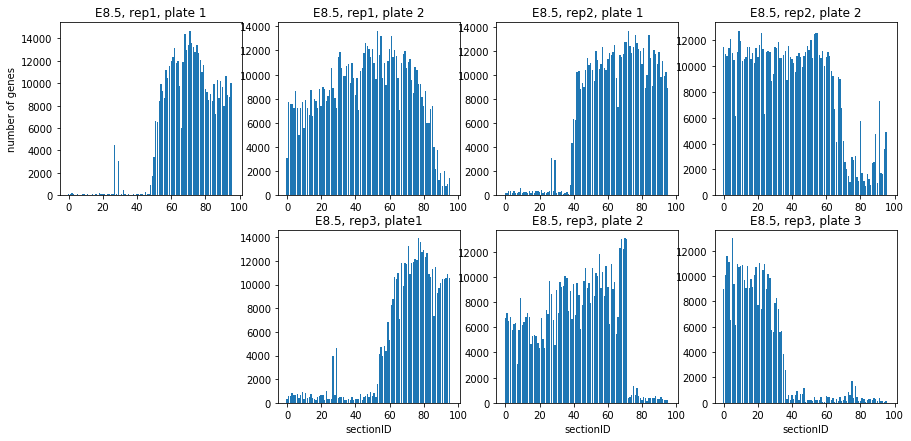

In [21]:
plt.figure(figsize=(15,7))

plt.subplot(241)
plt.bar(range(len(dfE8rep1plate1[0].columns)), (dfE8rep1plate1[0]>1).sum(axis=0))
plt.ylabel('number of genes')
plt.title('E8.5, rep1, plate 1')

plt.subplot(242)
plt.bar(range(len(dfE8rep1plate2[0].columns)), (dfE8rep1plate2[0]>1).sum(axis=0))
plt.title('E8.5, rep1, plate 2')

plt.subplot(243)
plt.bar(range(len(dfE8rep2plate1[0].columns)), (dfE8rep2plate1[0]>1).sum(axis=0))
plt.title('E8.5, rep2, plate 1')

plt.subplot(244)
plt.bar(range(len(dfE8rep2plate2[0].columns)), (dfE8rep2plate2[0]>1).sum(axis=0))
plt.title('E8.5, rep2, plate 2')

plt.subplot(246)
plt.bar(range(len(dfE8rep3plate1[0].columns)), (dfE8rep3plate1[0]>1).sum(axis=0))
plt.xlabel('sectionID')
plt.title('E8.5, rep3, plate1')

plt.subplot(247)
plt.bar(range(len(dfE8rep3plate2[0].columns)), (dfE8rep3plate2[0]>1).sum(axis=0))
plt.xlabel('sectionID')
plt.title('E8.5, rep3, plate 2')

plt.subplot(248)
plt.bar(range(len(dfE8rep3plate3[0].columns)), (dfE8rep3plate3[0]>1).sum(axis=0))
plt.xlabel('sectionID')
plt.title('E8.5, rep3, plate 3')

plt.savefig('../results/mouseEmbryoTomoAnalysis/E85_barplot_geneNum.pdf', bbox_inches = 'tight')

plt.show()

In [22]:
writer = pd.ExcelWriter('../results/mouseEmbryoTomoAnalysis/source_data_edf3c.xlsx', engine='xlsxwriter')

((dfE7rep1plate1[0]>1).sum()).to_excel(writer, sheet_name = 'mouse1_plate1_genes')
((dfE7rep1plate2[0]>1).sum()).to_excel(writer, sheet_name = 'mouse1_plate2_genes')

((dfE8rep1plate1[0]>1).sum()).to_excel(writer, sheet_name = 'mouse2_plate1_genes')
((dfE8rep1plate2[0]>1).sum()).to_excel(writer, sheet_name = 'mouse2_plate2_genes')

((dfE8rep2plate1[0]>1).sum()).to_excel(writer, sheet_name = 'mouse3_plate1_genes')
((dfE8rep2plate2[0]>1).sum()).to_excel(writer, sheet_name = 'mouse3_plate2_genes')
((dfE8rep2plate3[0]>1).sum()).to_excel(writer, sheet_name = 'mouse3_plate3_genes')

(dfE7rep1plate1[2].sum()).to_excel(writer, sheet_name = 'mouse1_plate1_trans')
(dfE7rep1plate2[2].sum()).to_excel(writer, sheet_name = 'mouse1_plate2_trans')

(dfE8rep1plate1[2].sum()).to_excel(writer, sheet_name = 'mouse2_plate1_trans')
(dfE8rep1plate2[2].sum()).to_excel(writer, sheet_name = 'mouse2_plate2_trans')

(dfE8rep2plate1[2].sum()).to_excel(writer, sheet_name = 'mouse3_plate1_trans')
(dfE8rep2plate2[2].sum()).to_excel(writer, sheet_name = 'mouse3_plate2_trans')
(dfE8rep2plate3[2].sum()).to_excel(writer, sheet_name = 'mouse3_plate3_trans')

writer.close()

In [23]:
thE8r1p1trans = 1e4; thE8r1p1genes = 7000
thE8r1p2trans = 4e4; thE8r1p2genes = 5000

thE8r2p1trans = 1e4; thE8r2p1genes = 8000
thE8r2p2trans = 4e4; thE8r2p2genes = 8000

thE8r3p1trans = 1e4; thE8r3p1genes = 5000
thE8r3p2trans = 1e4; thE8r3p2genes = 4000
thE8r3p3trans = 1e4; thE8r3p3genes = 5000

In [24]:
dfE8rep1plate1[2].columns[(dfE8rep1plate1[2].sum()>thE8r1p1trans)&((dfE8rep1plate1[0]>1).sum()>thE8r1p1genes)]

Index(['054', '055', '056', '057', '058', '059', '060', '061', '062', '063',
       '064', '065', '066', '068', '069', '070', '071', '072', '073', '074',
       '075', '076', '077', '078', '079', '080', '081', '082', '083', '084',
       '085', '086', '087', '088', '089', '090', '091', '092', '093', '094',
       '095', '096'],
      dtype='object')

In [25]:
dfE8rep1plate2[2].columns[(dfE8rep1plate2[2].sum()>thE8r2p2trans)&((dfE8rep1plate2[0]>1).sum()>thE8r2p2genes)]

Index(['006', '015', '020', '022', '023', '025', '026', '027', '028', '029',
       '031', '032', '033', '034', '035', '036', '037', '038', '039', '040',
       '041', '042', '044', '045', '046', '047', '048', '049', '050', '051',
       '052', '053', '054', '055', '056', '057', '058', '059', '060', '061',
       '062', '063', '064', '065', '066', '068', '069', '070', '071', '072',
       '073', '074', '075', '076', '077', '078', '079', '080', '082'],
      dtype='object')

In [26]:
dfE8rep2plate1[2].columns[(dfE8rep2plate1[2].sum()>thE8r2p1trans)&((dfE8rep2plate1[0]>1).sum()>thE8r2p1genes)]

Index(['043', '044', '045', '046', '047', '048', '049', '050', '051', '052',
       '053', '054', '055', '056', '057', '058', '059', '060', '061', '062',
       '063', '064', '065', '066', '068', '069', '070', '071', '072', '073',
       '074', '075', '076', '077', '078', '079', '080', '081', '082', '083',
       '084', '085', '086', '087', '088', '089', '090', '091', '092', '093',
       '094', '095', '096'],
      dtype='object')

In [27]:
dfE8rep2plate2[2].columns[(dfE8rep2plate2[2].sum()>thE8r2p2trans)&((dfE8rep2plate2[0]>1).sum()>thE8r2p2genes)]

Index(['001', '002', '003', '004', '005', '006', '007', '009', '010', '011',
       '012', '013', '014', '015', '016', '017', '018', '019', '020', '021',
       '022', '023', '024', '026', '027', '028', '029', '030', '031', '032',
       '033', '034', '035', '036', '037', '038', '039', '040', '041', '042',
       '043', '044', '045', '046', '047', '048', '049', '050', '051', '052',
       '053', '054', '055', '056', '057', '058', '059', '060', '061', '062',
       '063', '064', '065', '068', '069'],
      dtype='object')

In [28]:
dfE8rep3plate1[2].columns[(dfE8rep3plate1[2].sum()>thE8r3p1trans)&((dfE8rep3plate1[0]>1).sum()>thE8r3p1genes)]

Index(['060', '061', '062', '063', '064', '065', '066', '067', '068', '069',
       '070', '071', '072', '073', '074', '075', '076', '077', '078', '079',
       '080', '081', '082', '083', '084', '085', '086', '087', '088', '089',
       '090', '091', '092', '093', '094', '095', '096'],
      dtype='object')

In [29]:
dfE8rep3plate2[2].columns[(dfE8rep3plate2[2].sum()>thE8r3p2trans)&((dfE8rep3plate2[0]>1).sum()>thE8r3p2genes)]

Index(['001', '002', '003', '004', '005', '006', '007', '009', '010', '011',
       '012', '013', '014', '015', '016', '017', '018', '019', '020', '021',
       '022', '023', '024', '025', '026', '027', '028', '029', '030', '031',
       '032', '033', '034', '035', '036', '037', '038', '039', '040', '041',
       '042', '043', '044', '045', '046', '047', '048', '049', '050', '051',
       '052', '053', '054', '055', '056', '057', '058', '059', '060', '061',
       '062', '063', '064', '065', '066', '067', '068', '069', '070', '071',
       '072'],
      dtype='object')

In [30]:
dfE8rep3plate3[2].columns[(dfE8rep3plate3[2].sum()>thE8r3p3trans)&((dfE8rep3plate3[0]>1).sum()>thE8r3p3genes)]

Index(['001', '002', '003', '004', '005', '006', '007', '008', '009', '010',
       '011', '012', '013', '014', '015', '016', '017', '018', '019', '020',
       '021', '022', '023', '024', '025', '026', '027', '028', '029', '030',
       '031', '032', '033', '034', '035'],
      dtype='object')

In [36]:
outAlways = ['028','030','067']
col_e8r1p1 = [c for c in dfE8rep1plate1[2].columns[(dfE8rep1plate1[2].sum()>thE8r1p1trans)&((dfE8rep1plate1[0]>1).sum()>thE8r1p1genes)] if c not in outAlways]
col_e8r1p2 = [c for c in dfE8rep1plate2[2].columns[(dfE8rep1plate2[2].sum()>thE8r1p2trans)&((dfE8rep1plate2[0]>1).sum()>thE8r1p2genes)] if c not in outAlways]

col_e8r2p1 = [c for c in dfE8rep2plate1[2].columns[(dfE8rep2plate1[2].sum()>thE8r2p1trans)&((dfE8rep2plate1[0]>1).sum()>thE8r2p1trans)] if c not in outAlways]
col_e8r2p2 = [c for c in dfE8rep2plate2[2].columns[(dfE8rep2plate2[2].sum()>thE8r2p2trans)&((dfE8rep2plate2[0]>1).sum()>thE8r2p2genes)] if c not in outAlways]

col_e8r3p1 = [c for c in dfE8rep3plate1[2].columns[(dfE8rep3plate1[2].sum()>thE8r3p1trans)&((dfE8rep3plate1[0]>1).sum()>thE8r3p1genes)] if c not in outAlways]
col_e8r3p2 = [c for c in dfE8rep3plate2[2].columns[(dfE8rep3plate2[2].sum()>thE8r3p2trans)&((dfE8rep3plate2[0]>1).sum()>thE8r3p2genes)] if c not in outAlways]
col_e8r3p3 = [c for c in dfE8rep3plate3[2].columns[(dfE8rep3plate3[2].sum()>thE8r3p3trans)&((dfE8rep3plate3[0]>1).sum()>thE8r3p3genes)] if c not in outAlways]


In [37]:
len(col_e8r1p1), len(col_e8r1p2), len(col_e8r2p1), len(col_e8r2p2), len(col_e8r3p1), len(col_e8r3p2), len(col_e8r3p3)

(42, 81, 43, 63, 36, 68, 33)

In [38]:
dfE8r1 = mergeGstrls_2plates(dfE8rep1plate1, col_e8r1p1, 'p01', dfE8rep1plate2, col_e8r1p2, 'p02')
dfE8r2 = mergeGstrls_2plates(dfE8rep2plate1, col_e8r2p1, 'p01', dfE8rep2plate2, col_e8r2p2, 'p02')
dfE8r3 = mergeGstrls_3plates(dfE8rep3plate1, col_e8r3p1, 'p01', 
                             dfE8rep3plate2, col_e8r3p2, 'p02', 
                             dfE8rep3plate3, col_e8r3p3, 'p03')

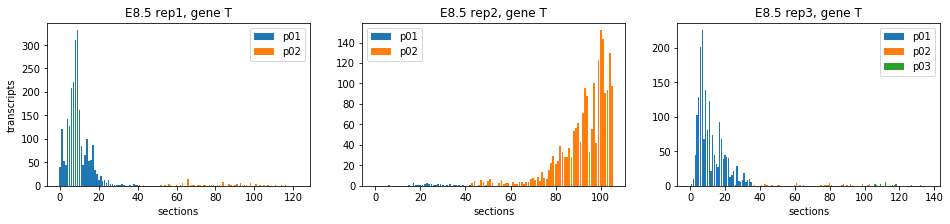

In [41]:
g = [idx for idx in dfE8r1[-1].index if 'T_' in idx][0]

plt.figure(figsize=(16,3))

plt.subplot(131)
cols0 = [c for c in dfE8r1[-1].columns if 'p01' in c]
plt.bar(range(len(cols0)), dfE8r1[-1].loc[g,cols0], label = 'p01'); 
cols1 = [c for c in dfE8r1[-1].columns if 'p02' in c]
plt.bar(range(len(cols0),len(cols1)+len(cols0)), dfE8r1[-1].loc[g,cols1], label = 'p02');
plt.legend()
plt.title('E8.5 rep1, gene T')
plt.ylabel('transcripts')
plt.xlabel('sections')

plt.subplot(132)
cols0 = [c for c in dfE8r2[-1].columns if 'p01' in c]
plt.bar(range(len(cols0)), dfE8r2[-1].loc[g,cols0], label = 'p01'); 
cols1 = [c for c in dfE8r2[-1].columns if 'p02' in c]
plt.bar(range(len(cols0),len(cols1)+len(cols0)), dfE8r2[-1].loc[g,cols1], label = 'p02');
plt.legend()
plt.title('E8.5 rep2, gene T')
plt.xlabel('sections')

plt.subplot(133)
cols0 = [c for c in dfE8r3[-1].columns if 'p01' in c]
plt.bar(range(len(cols0)), dfE8r3[-1].loc[g,cols0], label = 'p01'); 
cols1 = [c for c in dfE8r3[-1].columns if 'p02' in c]
plt.bar(range(len(cols0),len(cols1)+len(cols0)), dfE8r3[-1].loc[g,cols1], label = 'p02');
cols2 = [c for c in dfE8r3[-1].columns if 'p03' in c]
plt.bar(range(len(cols0)+len(cols1),len(cols1)+len(cols0)+len(cols2)), dfE8r3[-1].loc[g,cols2], label = 'p03');
plt.legend()
plt.title('E8.5 rep3, gene T')
plt.xlabel('sections')

plt.savefig('../results/mouseEmbryoTomoAnalysis/geneT_rawdata_E85.pdf', bbox_inches = 'tight')
plt.show()

In [42]:
dfE8r1 = renameGst(dfE8r1, 'PA')
dfE8r2 = renameGst(dfE8r2, 'AP')
dfE8r3 = renameGst(dfE8r3, 'PA')

In [43]:
savedfs(dfE8r1, '../E85_exp1')
savedfs(dfE8r2, '../E85_exp2')
savedfs(dfE8r3, '../E85_exp3')

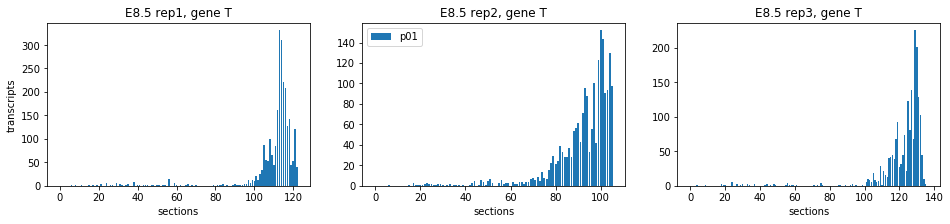

In [45]:
g = [idx for idx in dfE8r1[-1].index if 'T_' in idx][0]

plt.figure(figsize=(16,3))

plt.subplot(131)
plt.bar(range(len(dfE8r1[0].columns)), dfE8r1[-1].loc[g], label = 'p01'); 
plt.title('E8.5 rep1, gene T')
plt.ylabel('transcripts')
plt.xlabel('sections')

plt.subplot(132)
plt.bar(range(len(dfE8r2[0].columns)), dfE8r2[-1].loc[g], label = 'p01'); 
plt.legend()
plt.title('E8.5 rep2, gene T')
plt.xlabel('sections')

plt.subplot(133)
plt.bar(range(len(dfE8r3[0].columns)), dfE8r3[-1].loc[g], label = 'p01'); 
plt.title('E8.5 rep3, gene T')
plt.xlabel('sections')

plt.show()

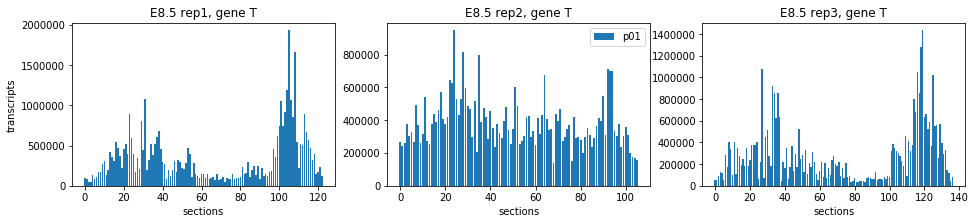

In [46]:
g = [idx for idx in dfE8r1[-1].index if 'T_' in idx][0]

plt.figure(figsize=(16,3))

plt.subplot(131)
plt.bar(range(len(dfE8r1[0].columns)), dfE8r1[-1].sum(), label = 'p01'); 
plt.title('E8.5 rep1, gene T')
plt.ylabel('transcripts')
plt.xlabel('sections')

plt.subplot(132)
plt.bar(range(len(dfE8r2[0].columns)), dfE8r2[-1].sum(), label = 'p01'); 
plt.legend()
plt.title('E8.5 rep2, gene T')
plt.xlabel('sections')

plt.subplot(133)
plt.bar(range(len(dfE8r3[0].columns)), dfE8r3[-1].sum(), label = 'p01'); 
plt.title('E8.5 rep3, gene T')
plt.xlabel('sections')

plt.show()